In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datos_limpios.csv')
data


,Fecha,Utilidad
0,01/01/23,32.22
1,02/01/23,25.34
2,03/01/23,27.18
3,04/01/23,15.58
4,05/01/23,16.08
...,...,...
495,10/05/24,34.45
496,11/05/24,27.24
497,12/05/24,28.23
498,13/05/24,14.72


In [3]:
# Convertir la columna de fechas al formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

In [4]:
# Establecer la fecha como índice para el modelado de series temporales
data.set_index('Fecha', inplace=True)

In [5]:
# Ajustar un modelo ARIMA (AutoRegressive Integrated Moving Average)
model = ARIMA(data['Utilidad'], order=(5, 1, 0))
model_fit = model.fit()

/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/laptop/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [6]:
# Pronosticar la utilidad desde junio 2024 hasta diciembre 2024
forecast_steps = 7  # Número de meses de junio a diciembre
forecast = model_fit.forecast(steps=forecast_steps)

In [7]:
# Fechas para el periodo pronosticado
forecast_dates = pd.date_range(start='2024-06-01', periods=forecast_steps, freq='MS')


In [8]:
# Crear un DataFrame para almacenar los resultados del pronóstico
forecast_df = pd.DataFrame({'Fecha': forecast_dates, 'Utilidad Pronosticada': forecast})


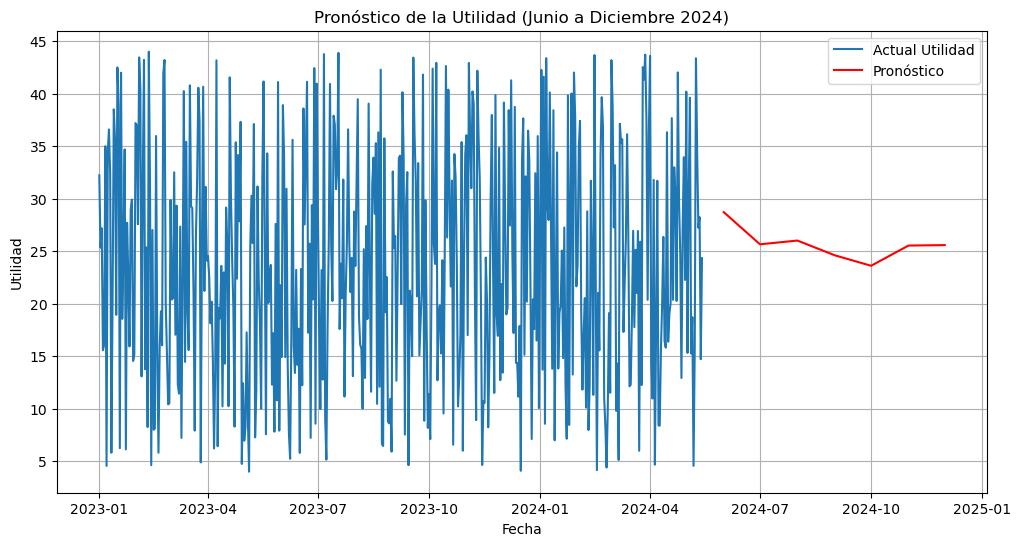

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Utilidad'], label='Actual Utilidad')
plt.plot(forecast_df['Fecha'], forecast_df['Utilidad Pronosticada'], label='Pronóstico', color='red')
plt.title('Pronóstico de la Utilidad (Junio a Diciembre 2024)')
plt.xlabel('Fecha')
plt.ylabel('Utilidad')
plt.legend()
plt.grid(True)
plt.show()